In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
dff = pd.read_csv(r'C:\Kenil Ramani\QB\GoalBot\CSV\dataset_v1.27.csv')

In [3]:
df = dff.drop(['salesYear', 'salesMonth', 'InvoiceWeek'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129271 entries, 0 to 129270
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   invoiceDate      129271 non-null  object 
 1   salesDetails_id  129271 non-null  int64  
 2   billAmount       129271 non-null  int64  
 3   stockistId       102314 non-null  float64
 4   chemistId        25467 non-null   float64
 5   categoryId       20749 non-null   float64
 6   hqId             117350 non-null  float64
 7   hqName           117350 non-null  object 
 8   regionId         117350 non-null  float64
 9   cityId           114418 non-null  float64
 10  cityName         114418 non-null  object 
 11  mrp              129271 non-null  float64
 12  qty              129271 non-null  int64  
 13  free             129271 non-null  int64  
 14  rate             129271 non-null  float64
 15  amount           129271 non-null  float64
 16  productId        129271 non-null  int6

In [ ]:
df

In [115]:
df['productId'].unique()                 # 138

array([   26,   168,   248,   195,   254,   226,   283,    73,   218,
         234,   285,   249,    52,   233,   172,   216, 17249,   238,
           2,   223,   236,    75,   215,   205,   190,   169,   231,
         244,    70,   192,   206,     1,   212,   235,    13,   170,
           8,    35,   189,   165,   222,   181,   217,   255,   188,
         198,   252,   211,   185,   209,    27,   229,   203,   284,
         193,   220,   277,   167,   239,   241,   232,   280,    36,
         180,   221,   227,    46,   196,   253,    43,   194,   213,
          38,   173,   208,   224,   228,   177,   210,    71,   256,
         245,    42,    37, 17229,   271,   246,   261,   325,   294,
       17367,   201,   166,   260,   264,   230, 17366,   202,   263,
         278,   251,   250, 17368,   257,   265,    76,   270,   276,
          50,    48,   267,    79,   266,    11,   298,    16,    12,
          17, 17232, 17251, 17230, 17615, 17234, 17235, 17233, 17244,
       17253, 17370,

In [116]:
the_ids = [26,   168,   248,   195,   254,   226,   283,    73,   218,
         234,   285,   249,    52,   233,   172,   216, 17249,   238,
           2,   223,   236,    75,   215,   205,   190,   169,   231,
         244,    70,   192,   206,     1,   212,   235,    13,   170,
           8,    35,   189,   165,   222,   181,   217,   255,   188,
         198,   252,   211,   185,   209,    27,   229,   203,   284,
         193,   220,   277,   167,   239,   241,   232,   280,    36,
         180,   221,   227,    46,   196,   253,    43,   194,   213,
          38,   173,   208,   224,   228,   177,   210,    71,   256,
         245,    42,    37, 17229,   271,   246,   261,   325,   294,
       17367,   201,   166,   260,   264,   230, 17366,   202,   263,
         278,   251,   250, 17368,   257,   265,    76,   270,   276,
          50,    48,   267,    79,   266,    11,   298,    16,    12,
          17, 17232, 17251, 17230, 17615, 17234, 17235, 17233, 17244,
       17253, 17370, 17369, 17362, 17560, 17553, 17558, 17616, 17614,
       17617, 17624, 17625]

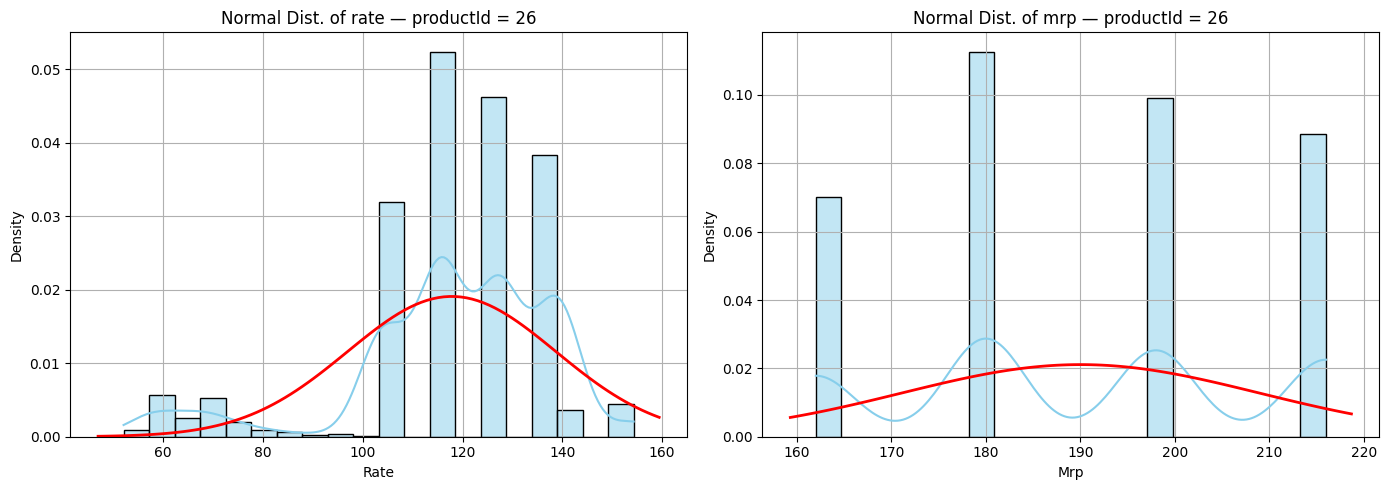

In [118]:
# Only Graph

def mygraph(id):
    filtered_df = df[df['productId'] == id]

    if filtered_df.empty:
        print(f"No data for productId: {id}")
        return

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    for i, column in enumerate(['rate', 'mrp']):
        data = filtered_df[column]
        sns.histplot(data, kde=True, stat="density", bins=20, color="skyblue", edgecolor="black", ax=axs[i])

        mean = data.mean()
        std = data.std()
        xmin, xmax = axs[i].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mean, std)
        axs[i].plot(x, p, 'r', linewidth=2)

        axs[i].set_title(f'Normal Dist. of {column} — productId = {id}')
        axs[i].set_xlabel(column.capitalize())
        axs[i].set_ylabel('Density')
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# for z in the_ids:
#     mygraph(z)
mygraph(26)

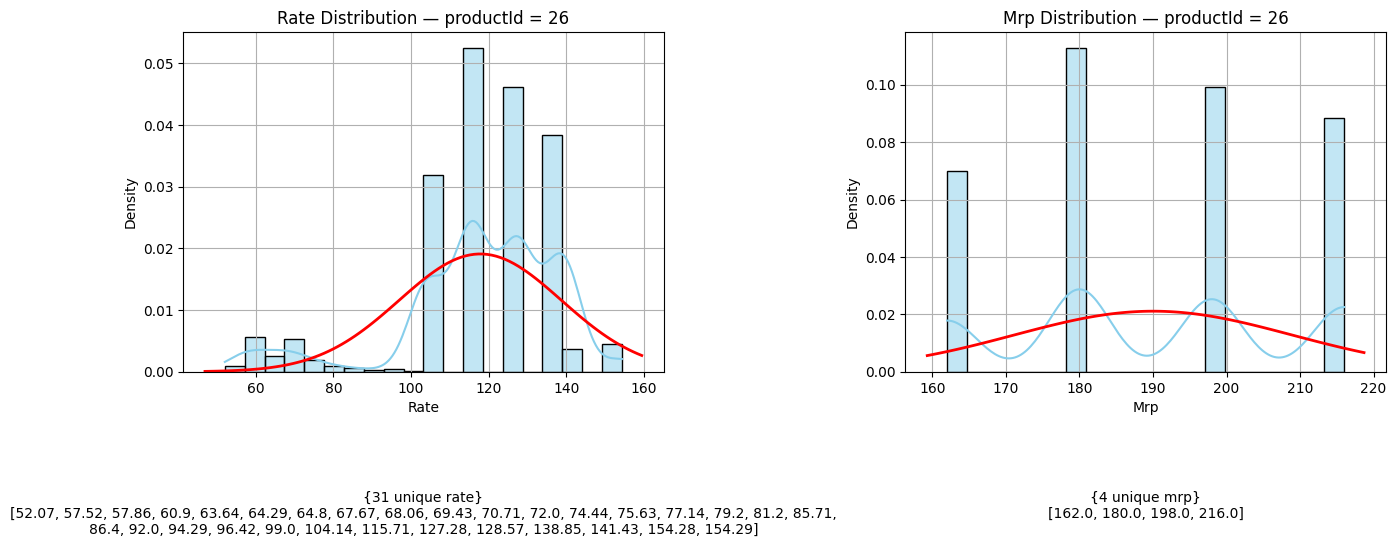

In [119]:
# Graphs with list and total no.

def mygraph(id):
    filtered_df = df[df['productId'] == id]

    if filtered_df.empty:
        print(f"No data for productId: {id}")
        return

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for col_idx, column in enumerate(['rate', 'mrp']):
        data = filtered_df[column]

        # Plot histogram with KDE
        sns.histplot(data, kde=True, stat="density", bins=20, color="skyblue", edgecolor="black", ax=axs[col_idx])

        mean = data.mean()
        std = data.std()
        xmin, xmax = axs[col_idx].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mean, std)
        axs[col_idx].plot(x, p, 'r', linewidth=2)

        axs[col_idx].set_title(f'{column.capitalize()} Distribution — productId = {id}')
        axs[col_idx].set_xlabel(column.capitalize())
        axs[col_idx].set_ylabel('Density')
        axs[col_idx].grid(True)

        # Add text below plot
        unique_vals = sorted(data.dropna().unique())
        count_unique = len(unique_vals)
        unique_text = f"{{{count_unique} unique {column}}}\n[{', '.join(map(str, unique_vals))}]"
        axs[col_idx].text(0.5, -0.35, unique_text,
                          fontsize=10, ha='center', va='top', transform=axs[col_idx].transAxes, wrap=True)

    plt.tight_layout()
    plt.show()

# for z in the_ids:
#     mygraph(z)
mygraph(26)

In [120]:
# SCATTERED GRAPH  (NOT MUCH USEFUL IN THIS CASE)

# def scatter_graph(id):
#     filtered_df = df[df['productId'] == id]

#     if filtered_df.empty:
#         print(f"No data for productId: {id}")
#         return

#     fig, axs = plt.subplots(1, 2, figsize=(14, 5))

#     for col_idx, column in enumerate(['rate', 'mrp']):
#         value_counts = filtered_df[column].value_counts().sort_index()

#         axs[col_idx].scatter(value_counts.index, value_counts.values, color='orange', s=60, edgecolor='black')
#         axs[col_idx].set_title(f'{column.capitalize()} Scatter — productId = {id}')
#         axs[col_idx].set_xlabel(column.capitalize())
#         axs[col_idx].set_ylabel('Count (Frequency)')
#         axs[col_idx].grid(True)

#     plt.tight_layout()
#     plt.show()

# for z in the_ids:
#     scatter_graph(z)

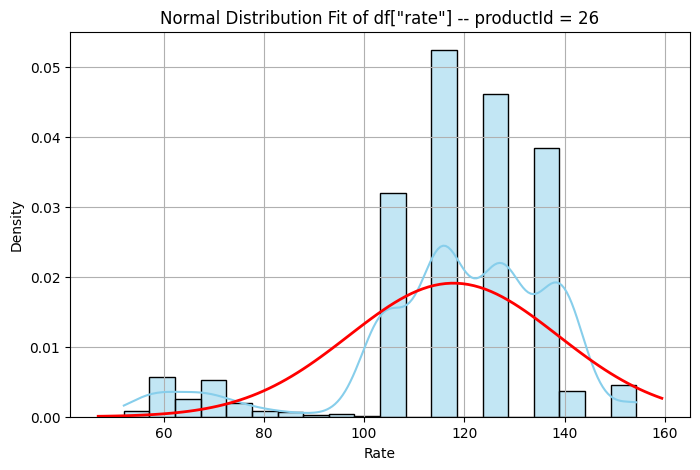

In [121]:

df = df[df['productId']==26]

# Plot histogram with KDE (normal distribution fit)
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], kde=True, stat="density", bins=20, color="skyblue", edgecolor="black")

# Overlay actual normal distribution
mean = df['rate'].mean()
std = df['rate'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title('Normal Distribution Fit of df["rate"] -- productId = 26')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [122]:
# m = df2['rate'].quantile(0.10)
# n = df2['rate'].quantile(0.80)
# m

In [123]:
df['rate']

0          68.06
7         104.14
8         104.14
47        115.71
93        104.14
           ...  
129044    138.85
129135    138.85
129244    154.29
129245    138.85
129255    138.85
Name: rate, Length: 1788, dtype: float64